# 1. Model Performance Evaluation:
   The F1 score of 0.318 indicates that the model has moderate performance. While it provides valuable insights into potential churn, there is room for improvement. Further exploration of feature engineering, hyperparameter tuning, and potentially trying other algorithms might enhance the model's performance. The F1 score is a suitable metric for this use case because it balances precision and recall, which is crucial for customer churn prediction. Precision measures the accuracy of positive predictions, while recall measures the model's ability to capture all positive instances. The F1 score considers both false positives and false negatives, providing a comprehensive evaluation.

# 2. Model Underperformance Analysis:
   The model underperforms in cases where there are unobserved factors influencing churn that are not included in the dataset. Additionally,the dataset is imbalanced, where the majority of customers do not churn. In this case, the model struggled to accurately predict the minority class despite using over sampling techniques

# 3. Advantages and Disadvantages of Random Forest for Customer Churn Prediction:

   Advantages:
      Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees, reducing the risk of overfitting and increasing generalization to new data.
      Handles Non-linearity: Random Forest can capture non-linear relationships between features and the target variable, which can be valuable in complex datasets.
      Robust to Outliers: Random Forest is less sensitive to outliers compared to some other algorithms, making it suitable for datasets with varying data quality.

   Disadvantages:
      Black Box Model: Random Forests can be considered as black box models, making it challenging to interpret the decision-making process.
      Computationally Intensive: Training a large number of decision trees can be computationally expensive and time-consuming.
      May Overfit Small Datasets:On small datasets, Random Forest has the potential to overfit, especially if hyperparameters are not properly tuned.

# 4. Relating Model Performance to Financial Impact:
   To connect the model's performance to the client's financial outcomes, additional information is essential, including the cost of acquiring a new customer and the potential revenue loss due to churn. Assuming the model effectively identifies potential churners, the client has the opportunity to implement targeted retention strategies, offering a 20% discount to those predicted as positive for churn. By doing so, the company aims to incentivize at-risk customers to stay, ultimately reducing customer attrition and potential revenue loss. The financial benefit lies in the retained revenue from customers who might have otherwise churned, offsetting the cost of providing discounts and fostering customer loyalty.


In [1]:
import pandas as pd

In [2]:
client_df = pd.read_csv('/Users/arjunreddypulugu/Desktop/client_data.csv')
price_df = pd.read_csv('/Users/arjunreddypulugu/Desktop/price_data.csv')

In [3]:
client_df.shape, price_df.shape

((14606, 26), (193002, 8))

In [4]:
client_df.columns, price_df.columns

(Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
        'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
        'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
        'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
        'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
        'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
        'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
       dtype='object'),
 Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
        'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
        'price_mid_peak_fix'],
       dtype='object'))

In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
client_df.origin_up.nunique()

6

In [8]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format = '%Y-%m-%d')

In [10]:
monthly_price_by_id=price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

In [11]:
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
diff = pd.merge(jan_prices.rename(columns = {'price_off_peak_var': 'jan1', 'price_off_peak_fix':'jan2'}), dec_prices, on='id')
diff.drop(columns = ['price_date_x','price_date_y' ], axis=1, inplace=True)

In [12]:
diff['off_peak_diff_energy'] = diff['price_off_peak_var']- diff['jan1']
diff['off_peak_diff_pow'] = diff['price_off_peak_fix']- diff['jan2']
diff = diff[['id', 'off_peak_diff_energy', 'off_peak_diff_pow']]


In [13]:
diff.head()

,id,off_peak_diff_energy,off_peak_diff_pow
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [14]:
monthly_peak_price = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix':'mean'}).reset_index()
peak_price_jan = monthly_peak_price.groupby('id').first().reset_index()
peak_price_dec = monthly_peak_price.groupby('id').last().reset_index()

diff_peak = pd.merge(peak_price_jan.drop('price_date', axis =1), peak_price_dec.drop('price_date', axis=1).rename(columns = {'price_peak_var': 'dec_var', 'price_peak_fix': 'dec_fix'}), on='id')
diff_peak['diff_peak_energy']= diff_peak['dec_var']- diff_peak['price_peak_var']
diff_peak['diff_peak_pow']= diff_peak['dec_fix']- diff_peak['price_peak_fix']
diff_peak = diff_peak[['id', 'diff_peak_energy', 'diff_peak_pow']]
diff_peak.head()

,id,diff_peak_energy,diff_peak_pow
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [15]:
monthly_mid_peak_price = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var': 'mean', 'price_mid_peak_fix':'mean'}).reset_index()
mid_peak_price_jan = monthly_mid_peak_price.groupby('id').first().reset_index()
mid_peak_price_dec = monthly_mid_peak_price.groupby('id').last().reset_index()

diff_mid_peak = pd.merge(mid_peak_price_jan.drop('price_date', axis =1), mid_peak_price_dec.drop('price_date', axis=1).rename(columns = {'price_mid_peak_var': 'dec_mp_var', 'price_mid_peak_fix': 'dec_mp_fix'}), on='id')
diff_mid_peak['diff_mid_peak_energy']= diff_mid_peak['dec_mp_var']- diff_mid_peak['price_mid_peak_var']
diff_mid_peak['diff_mid_peak_pow']= diff_mid_peak['dec_mp_fix']- diff_mid_peak['price_mid_peak_fix']
diff_mid_peak = diff_mid_peak[['id', 'diff_mid_peak_energy', 'diff_mid_peak_pow']]
diff_mid_peak.head()

,id,diff_mid_peak_energy,diff_mid_peak_pow
0,0002203ffbb812588b632b9e628cc38d,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [16]:
price_fdf = pd.merge(diff, diff_peak, on='id')
price_fdf = pd.merge(price_fdf, diff_mid_peak, on ='id')
price_fdf.head()

,id,off_peak_diff_energy,off_peak_diff_pow,diff_peak_energy,diff_peak_pow,diff_mid_peak_energy,diff_mid_peak_pow
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.097749,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000


In [17]:
price_fdf.describe()

,off_peak_diff_energy,off_peak_diff_pow,diff_peak_energy,diff_peak_pow,diff_mid_peak_energy,diff_mid_peak_pow
count,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,-0.004545,0.279544,-0.000976,-0.048744,0.000399,-0.028724
std,0.012778,1.432820,0.011173,2.338325,0.007403,1.463097
min,-0.148477,-44.266931,-0.143815,-36.344726,-0.098720,-16.724389
25%,-0.008161,0.000004,-0.003317,0.000000,0.000000,0.000000
50%,-0.005610,0.162916,0.000000,0.000000,0.000000,0.000000
75%,-0.003573,0.177779,0.000000,0.097749,0.000718,0.065166
max,0.168958,40.728885,0.148474,36.490689,0.103502,16.791555


In [18]:
price_df.price_date.unique()

array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [19]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


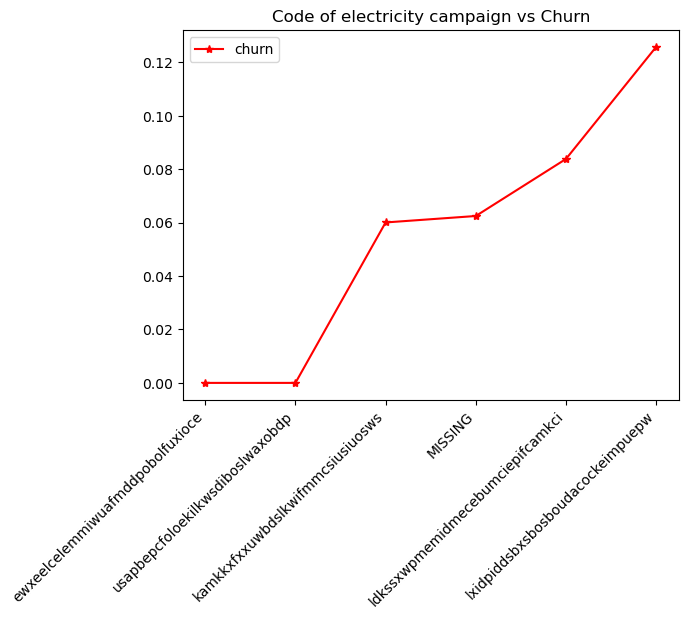

In [21]:
client_df.groupby('origin_up').agg({'churn': 'mean'}).sort_values(by='churn').reset_index().plot(x='origin_up', y='churn', marker='*', color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Code of electricity campaign vs Churn')
plt.xlabel('')
plt.show()

In [22]:
client_df[client_df['origin_up']=='MISSING'].shape

(64, 26)

In [23]:
client_df.num_years_antig.nunique()

13

In [24]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

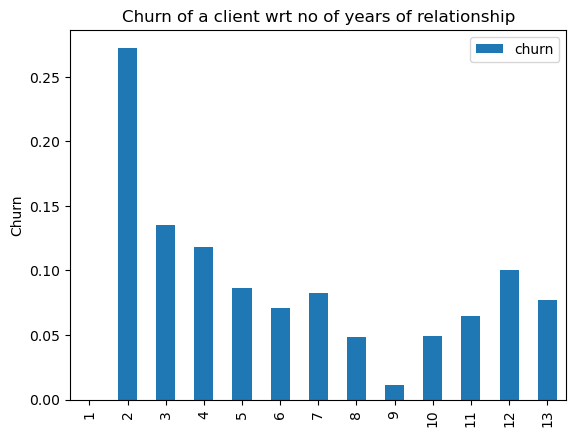

In [25]:
client_df.groupby('num_years_antig').agg({'churn': 'mean'}).reset_index().astype({'num_years_antig': 'category'}).plot(kind ='bar', x='num_years_antig', y='churn')
plt.title('Churn of a client wrt no of years of relationship')
plt.xlabel('')
plt.ylabel('Churn')
plt.show()

In [26]:
client_df.nb_prod_act.nunique()

10

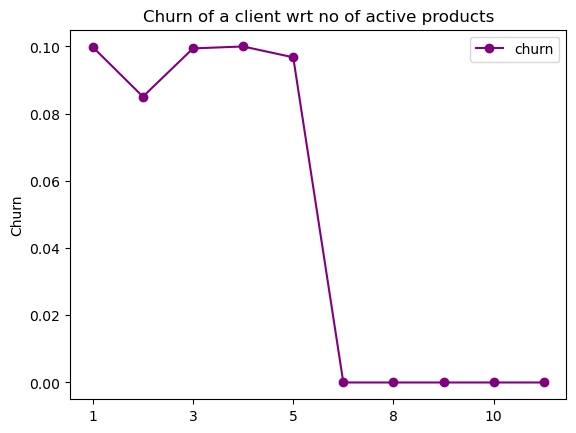

In [27]:
client_df.groupby('nb_prod_act').agg({'churn': 'mean'}).reset_index().astype({'nb_prod_act': 'category'}).plot(x='nb_prod_act', y='churn', marker='o',color ='purple')
plt.title('Churn of a client wrt no of active products')
plt.xlabel('')
plt.ylabel('Churn')
plt.show()

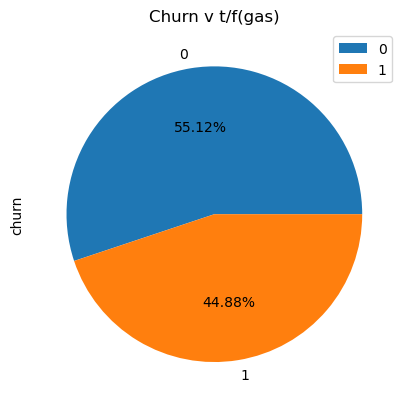

In [28]:
client_df.groupby('has_gas').agg({'churn':'mean'}).reset_index().plot(kind='pie', y='churn',  autopct ='%1.2f%%')
plt.title('Churn v t/f(gas)')
plt.show()

In [29]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [30]:
client_df.churn.value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [31]:
merge_df = pd.merge(price_fdf, client_df, on='id', how='right')
merge_df.head()

,id,off_peak_diff_energy,off_peak_diff_pow,diff_peak_energy,diff_peak_pow,diff_mid_peak_energy,diff_mid_peak_pow,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [32]:
merge_df.channel_sales.nunique()

8

In [33]:
merge_df['date_activ'] = pd.to_datetime(merge_df['date_activ'])
merge_df['date_end'] = pd.to_datetime(merge_df['date_end'])
merge_df['date_modif_prod'] = pd.to_datetime(merge_df['date_modif_prod'])
merge_df['date_renewal'] =pd.to_datetime(merge_df['date_renewal'])

merge_df['day_activ']= merge_df['date_activ'].dt.day
merge_df['month_activ']= merge_df['date_activ'].dt.month
merge_df['year_activ']= merge_df['date_activ'].dt.year

merge_df['day_end']= merge_df['date_end'].dt.day
merge_df['month_end']= merge_df['date_end'].dt.month
merge_df['year_end']= merge_df['date_end'].dt.year

merge_df['day_modif']= merge_df['date_modif_prod'].dt.day
merge_df['month_modif']= merge_df['date_modif_prod'].dt.month
merge_df['year_modif']= merge_df['date_modif_prod'].dt.year

merge_df['day_renew']= merge_df['date_renewal'].dt.day
merge_df['month_renew']= merge_df['date_renewal'].dt.month
merge_df['year_renew']= merge_df['date_renewal'].dt.year

merge_df.drop(columns =['date_activ','date_end','date_modif_prod', 'date_renewal'], axis =1, inplace=True)
merge_df.head()

,id,off_peak_diff_energy,off_peak_diff_pow,diff_peak_energy,diff_peak_pow,diff_mid_peak_energy,diff_mid_peak_pow,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,day_activ,month_activ,year_activ,day_end,month_end,year_end,day_modif,month_modif,year_modif,day_renew,month_renew,year_renew
0,24011ae4ebbe3035111d65fa7c15bc57,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,15,6,2013,15,6,2016,1,11,2015,23,6,2015
1,d29c2c54acc38ff3c0614d0a653813dd,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,21,8,2009,30,8,2016,21,8,2009,31,8,2015
2,764c75f661154dac3a6c254cd082ea7d,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,16,4,2010,16,4,2016,16,4,2010,17,4,2015
3,bba03439a292a1e166f80264c16191cb,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,30,3,2010,30,3,2016,30,3,2010,31,3,2015
4,149d57cf92fc41cf94415803a877cb4b,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,13,1,2010,7,3,2016,13,1,2010,9,3,2015


In [34]:
merge_df_channel= pd.get_dummies(merge_df['channel_sales'], drop_first=True)
merge_df_hasgas= pd.get_dummies(merge_df['has_gas'], drop_first = True)
merge_df_origin= pd.get_dummies(merge_df['origin_up'], drop_first = True)

merge_df = pd.concat([merge_df, merge_df_channel, merge_df_hasgas, merge_df_origin], axis=1)
merge_df.drop(columns =['channel_sales', 'has_gas', 'origin_up'], axis=1, inplace=True)
merge_df.head()

,id,off_peak_diff_energy,off_peak_diff_pow,diff_peak_energy,diff_peak_pow,diff_mid_peak_energy,diff_mid_peak_pow,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,day_activ,month_activ,year_activ,day_end,month_end,year_end,day_modif,month_modif,year_modif,day_renew,month_renew,year_renew,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf,t,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1,15,6,2013,15,6,2016,1,11,2015,23,6,2015,0,0,0,1,0,0,0,1,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0,21,8,2009,30,8,2016,21,8,2009,31,8,2015,0,0,0,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0,16,4,2010,16,4,2016,16,4,2010,17,4,2015,0,0,0,1,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0,30,3,2010,30,3,2016,30,3,2010,31,3,2015,0,0,0,0,1,0,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,19.800,0,13,1,2010,7,3,2016,13,1,2010,9,3,2015,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
merge_df.head()

,id,off_peak_diff_energy,off_peak_diff_pow,diff_peak_energy,diff_peak_pow,diff_mid_peak_energy,diff_mid_peak_pow,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,day_activ,month_activ,year_activ,day_end,month_end,year_end,day_modif,month_modif,year_modif,day_renew,month_renew,year_renew,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf,t,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1,15,6,2013,15,6,2016,1,11,2015,23,6,2015,0,0,0,1,0,0,0,1,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0,21,8,2009,30,8,2016,21,8,2009,31,8,2015,0,0,0,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0,16,4,2010,16,4,2016,16,4,2010,17,4,2015,0,0,0,1,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0,30,3,2010,30,3,2016,30,3,2010,31,3,2015,0,0,0,0,1,0,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,19.800,0,13,1,2010,7,3,2016,13,1,2010,9,3,2015,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
merge_df.drop('margin_net_pow_ele', axis=1, inplace=True)

In [105]:
X= merge_df.drop(columns =['id','churn'], axis =1)
y = merge_df['churn']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=22)

In [38]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE(random_state = 33)
X_resampled , y_resampled = smote.fit_resample(X_train, y_train )

In [109]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[600, 700, 800]}, cv=5)
clf.fit(X_resampled, y_resampled)
clf.best_params_

{'n_estimators': 700}

In [110]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=700)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

In [115]:
y_proba = model.predict_proba(X_test)[:, 1]
y_proba

array([0.11428571, 0.04285714, 0.38285714, ..., 0.18      , 0.13571429,
       0.09571429])

In [136]:
threshold = 0.26
y_pred_adjusted = (y_proba >= threshold).astype(int)


In [111]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_predict)
precision

0.6296296296296297

In [112]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_predict)
recall

0.0921409214092141

In [113]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_predict)
f1

0.1607565011820331

In [137]:
f1_score(y_test, y_pred_adjusted)

0.31822759315206445